In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

cleaned_data = pd.read_csv("/Users/rahilchadha/Credit-risk-assessment/datasets/cleaned_unscaled_data.csv")
# Ensure your dataset has columns: 'loan_amnt', 'person_income', 'loan_status', 'loan_int_rate', 'defaulted', 'max_loan_limit'


In [3]:
cleaned_data.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_encoded,cb_person_default_on_file_encoded,loan_grade_encoded,loan_intent_encoded
0,22,59000,5.0,35000,16.02,1,0.59,3,3,1,3,4
1,21,9600,5.0,1000,11.14,0,0.10,2,2,0,1,1
2,25,9600,1.0,5500,12.87,1,0.57,3,0,0,2,3
3,23,65500,4.0,35000,15.23,1,0.53,2,3,0,2,3
4,24,54400,8.0,35000,14.27,1,0.55,4,3,1,2,3


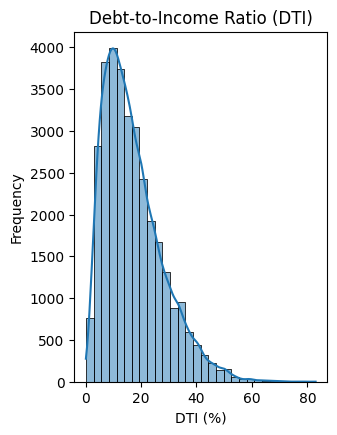

In [16]:
def compute_dti(df):
    df['DTI'] = (df['loan_amnt'] / df['person_income']) * 100

compute_dti(cleaned_data)

plt.figure(figsize=(15, 10))

# Debt-to-Income Ratio
plt.subplot(2, 4, 1)
sns.histplot(cleaned_data['DTI'], bins=30, kde=True)
plt.title('Debt-to-Income Ratio (DTI)')

#plt.legend()
plt.xlabel('DTI (%)')
plt.ylabel('Frequency')

plt.show()  

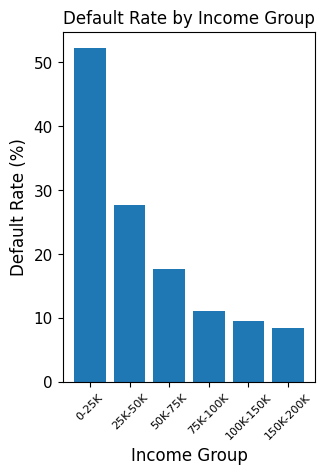

In [5]:
# Function to compute default rate per group
def compute_default_rate(df):
    df['Default_Rate'] = (df['loan_status'].sum() / len(df)) * 100

# Apply the function to the dataset
compute_default_rate(cleaned_data)

# Create income groups by binning 'person_income'
income_bins = [0, 25000, 50000, 75000, 100000, 150000, 200000]
income_labels = ['0-25K', '25K-50K', '50K-75K', '75K-100K', '100K-150K', '150K-200K']
cleaned_data['income_group'] = pd.cut(cleaned_data['person_income'], bins=income_bins, labels=income_labels)

# Compute default rate by income group
income_group_default_rate = cleaned_data.groupby('income_group')['loan_status'].mean() * 100

# Plot the default rate distribution by income group
plt.figure(figsize=(15, 10))

# Bar graph for default rate over different income groups
plt.subplot(2, 4, 2)
plt.bar(income_group_default_rate.index, income_group_default_rate)
plt.title('Default Rate by Income Group')
plt.xlabel('Income Group', fontsize=12)  # Smaller x-label font size
plt.ylabel('Default Rate (%)', fontsize=12)  # Smaller y-label font size

# Adjust the x-tick labels font size
plt.xticks(fontsize=8, rotation=45)  # Rotate labels by 45 degrees
plt.yticks(fontsize=11)

plt.show()

This serves as a risk management KPI for lenders. By tracking default rates within different income brackets, a financial institution can assess how income levels affect the likelihood of default.

It helps in adjusting lending policies or approval criteria to mitigate risk. For example, if a particular income group consistently shows high default rates, the institution might increase scrutiny on credit approvals for that group or credit loan terms.

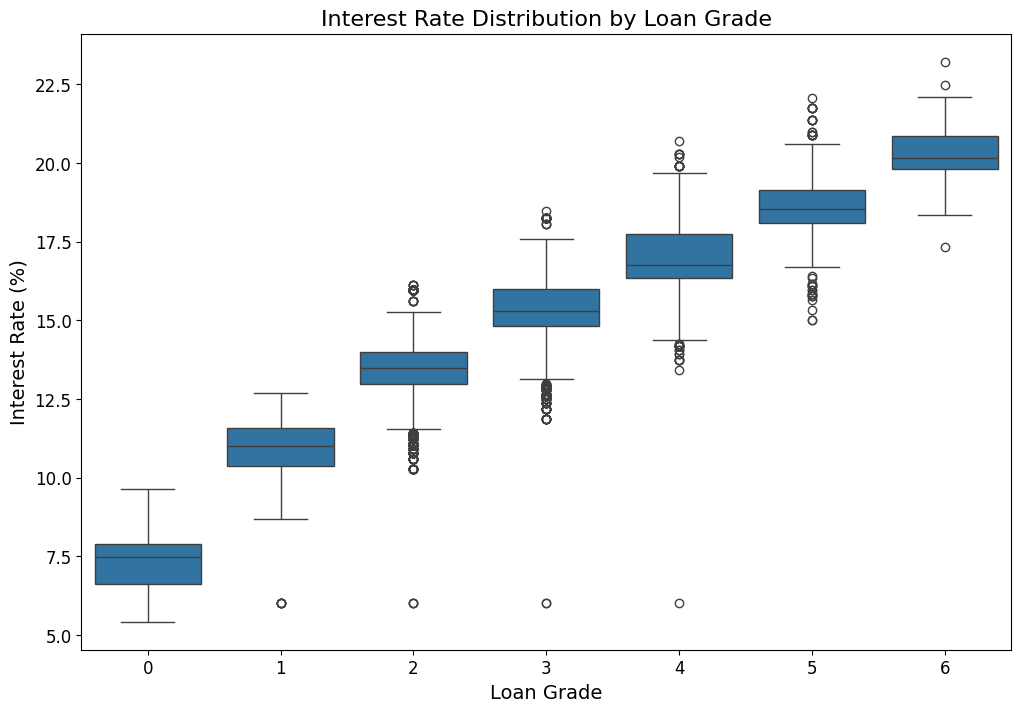

In [6]:
# Function to compute the overall average interest rate (for reference)
def compute_avg_interest_rate(df):
    df['Average_Interest_Rate'] = df['loan_int_rate'].mean()

# Apply the function to the dataset
compute_avg_interest_rate(cleaned_data)

# Set the figure size larger for better readability
plt.figure(figsize=(12, 8))

# Create a box plot of interest rates across different loan grades
sns.boxplot(x='loan_grade_encoded', y='loan_int_rate', data=cleaned_data)
plt.title('Interest Rate Distribution by Loan Grade', fontsize=16)  # Larger title font size
plt.xlabel('Loan Grade', fontsize=14)  # Larger x-label font size
plt.ylabel('Interest Rate (%)', fontsize=14)  # Larger y-label font size

# Adjust the font size and label rotation for better readability
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)

plt.show()



Tracking Interest Rate by Credit Grade is crucial for a credit card institution to ensure risk-based pricing, where high-risk customers are charged higher rates, protecting profitability. It helps maintain competitive positioning by offering fair rates to low-risk customers, enhancing customer retention. Additionally, it ensures regulatory compliance, avoiding potential legal issues related to unfair or predatory lending practices.

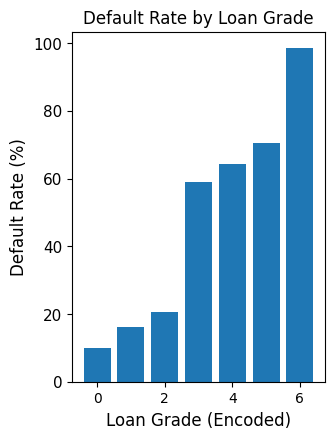

In [7]:
# Function to compute default rate per group
def compute_default_rate(df):
    df['Default_Rate'] = (df['loan_status'].sum() / len(df)) * 100

# Apply the function to the dataset
compute_default_rate(cleaned_data)

# Compute default rate by loan grade
loan_grade_default_rate = cleaned_data.groupby('loan_grade_encoded')['loan_status'].mean() * 100

# Plot the default rate distribution by loan grade
plt.figure(figsize=(15, 10))

# Bar graph for default rate over different loan grades
plt.subplot(2, 4, 3)
plt.bar(loan_grade_default_rate.index, loan_grade_default_rate)
plt.title('Default Rate by Loan Grade')
plt.xlabel('Loan Grade (Encoded)', fontsize=12)  # Smaller x-label font size
plt.ylabel('Default Rate (%)', fontsize=12)  # Smaller y-label font size

# Adjust the x-tick labels font size
plt.xticks(fontsize=10, rotation=0)  # Keep labels horizontal
plt.yticks(fontsize=11)

plt.show()


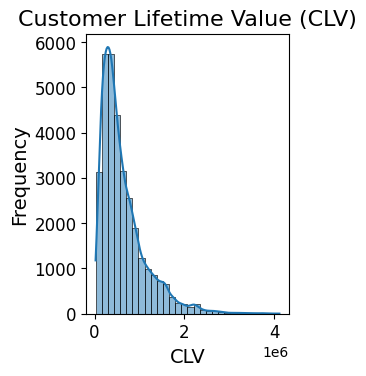

In [8]:
avg_loan_duration = cleaned_data['cb_person_cred_hist_length'].mean()  # Example using credit history length as loan duration

def compute_clv(df, avg_loan_duration):
    df['CLV'] = df['loan_amnt'] * df['loan_int_rate'] * avg_loan_duration

# Apply the function to compute CLV
compute_clv(cleaned_data, avg_loan_duration)

# Make the graph bigger
plt.figure(figsize=(12, 8))

# Customer Lifetime Value (CLV) Histogram
plt.subplot(2, 4, 5)
sns.histplot(cleaned_data['CLV'], bins=30, kde=True)
plt.title('Customer Lifetime Value (CLV)', fontsize=16)  # Larger title font
plt.xlabel('CLV', fontsize=14)  # Larger x-label font
plt.ylabel('Frequency', fontsize=14)  # Larger y-label font

# Adjust the font size for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


Customer Lifetime Value (CLV) is a critical KPI for credit card institutions as it measures the total revenue a customer is expected to generate over their relationship with the company. CLV helps institutions identify their most profitable customers, optimize marketing spend, and tailor retention strategies to maximize value. It also aids in assessing the long-term profitability of different customer segments, ensuring resources are allocated efficiently to retain high-value customers and improve overall financial performance.

The x-axis in the graph represents the Customer Lifetime Value (CLV), ranging from low to high as you move from left to right. A higher CLV indicates a more valuable customer, as they generate more revenue over their entire relationship with the company. This helps credit card institutions focus on retaining high-CLV customers to maximize long-term profitability. Customer lifetime value is the total worth to a business of a customer over the whole period of their relationship with the brand.

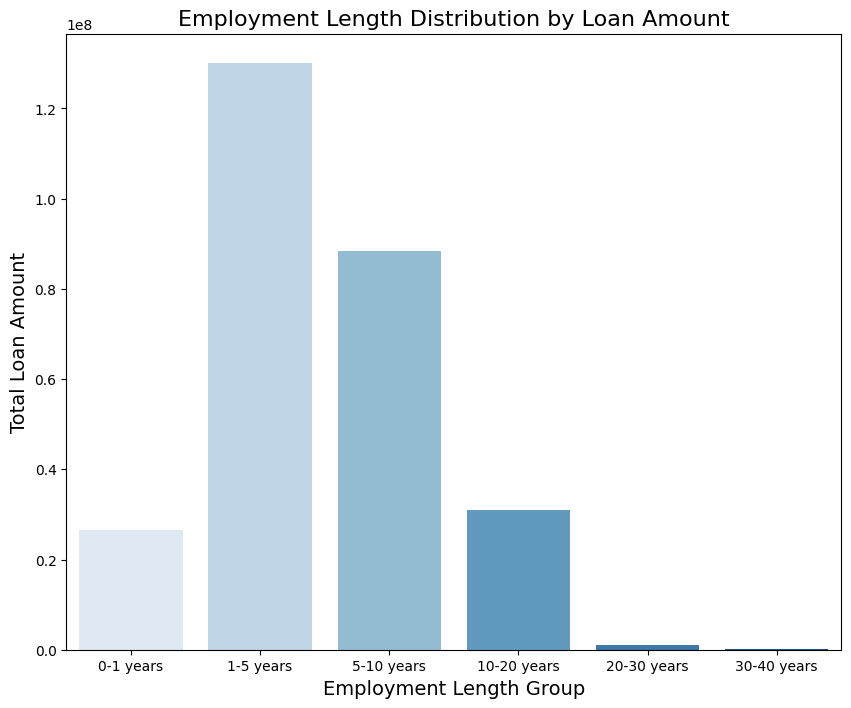

In [9]:
# Bin employment length into categories (customizable bins)
employment_bins = [0, 1, 5, 10, 20, 30, 40]  # Adjust based on your data
employment_labels = ['0-1 years', '1-5 years', '5-10 years', '10-20 years', '20-30 years', '30-40 years']

# Create employment length group column
cleaned_data['employment_length_group'] = pd.cut(cleaned_data['person_emp_length'], bins=employment_bins, labels=employment_labels)

# Group by employment length group and sum loan amounts
loan_amount_by_employment_length = cleaned_data.groupby('employment_length_group')['loan_amnt'].sum()

# Create a bar chart for the distribution of loan amounts across employment length groups
plt.figure(figsize=(10, 8))
sns.barplot(x=loan_amount_by_employment_length.index, y=loan_amount_by_employment_length, palette='Blues')

# Add titles and labels
plt.title('Employment Length Distribution by Loan Amount', fontsize=16)
plt.xlabel('Employment Length Group', fontsize=14)
plt.ylabel('Total Loan Amount', fontsize=14)

# Display the chart
plt.show()



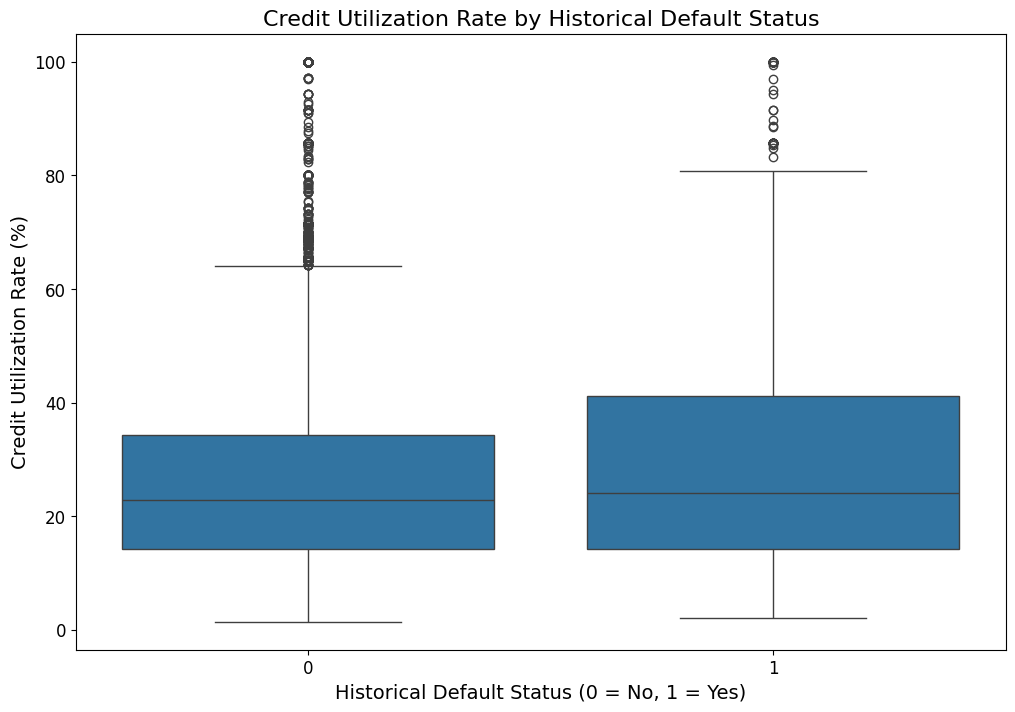

In [10]:
# Function to compute Credit Utilization Rate
def compute_credit_utilization(df, max_loan_limit):
    df['Credit_Utilization_Rate'] = (df['loan_amnt'] / max_loan_limit) * 100

# Assuming max loan limit is the max loan amount in your dataset
max_loan_limit = cleaned_data['loan_amnt'].max()

# Apply the function to compute credit utilization
compute_credit_utilization(cleaned_data, max_loan_limit)

# Set the figure size larger for better readability
plt.figure(figsize=(12, 8))

# Create a box plot of credit utilization rate across different default statuses (encoded)
sns.boxplot(x='cb_person_default_on_file_encoded', y='Credit_Utilization_Rate', data=cleaned_data)
plt.title('Credit Utilization Rate by Historical Default Status', fontsize=16)  # Larger title font size
plt.xlabel('Historical Default Status (0 = No, 1 = Yes)', fontsize=14)  # Larger x-label font size
plt.ylabel('Credit Utilization Rate (%)', fontsize=14)  # Larger y-label font size

# Adjust the font size and label rotation for better readability
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)

plt.show()


Text(0.5, 1.0, 'Loan Performance Index (LPI)')

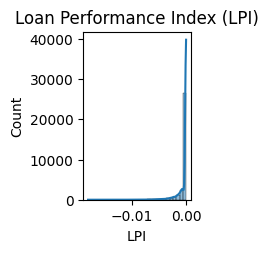

In [14]:
def compute_lpi(df):
    df['LPI'] = df['loan_status'] * (1 - df['loan_int_rate']) / df['loan_amnt']

compute_lpi(cleaned_data)    

# Loan Performance Index (LPI)
plt.subplot(2, 4, 4)
sns.histplot(cleaned_data['LPI'], bins=30, kde=True)
plt.title('Loan Performance Index (LPI)')

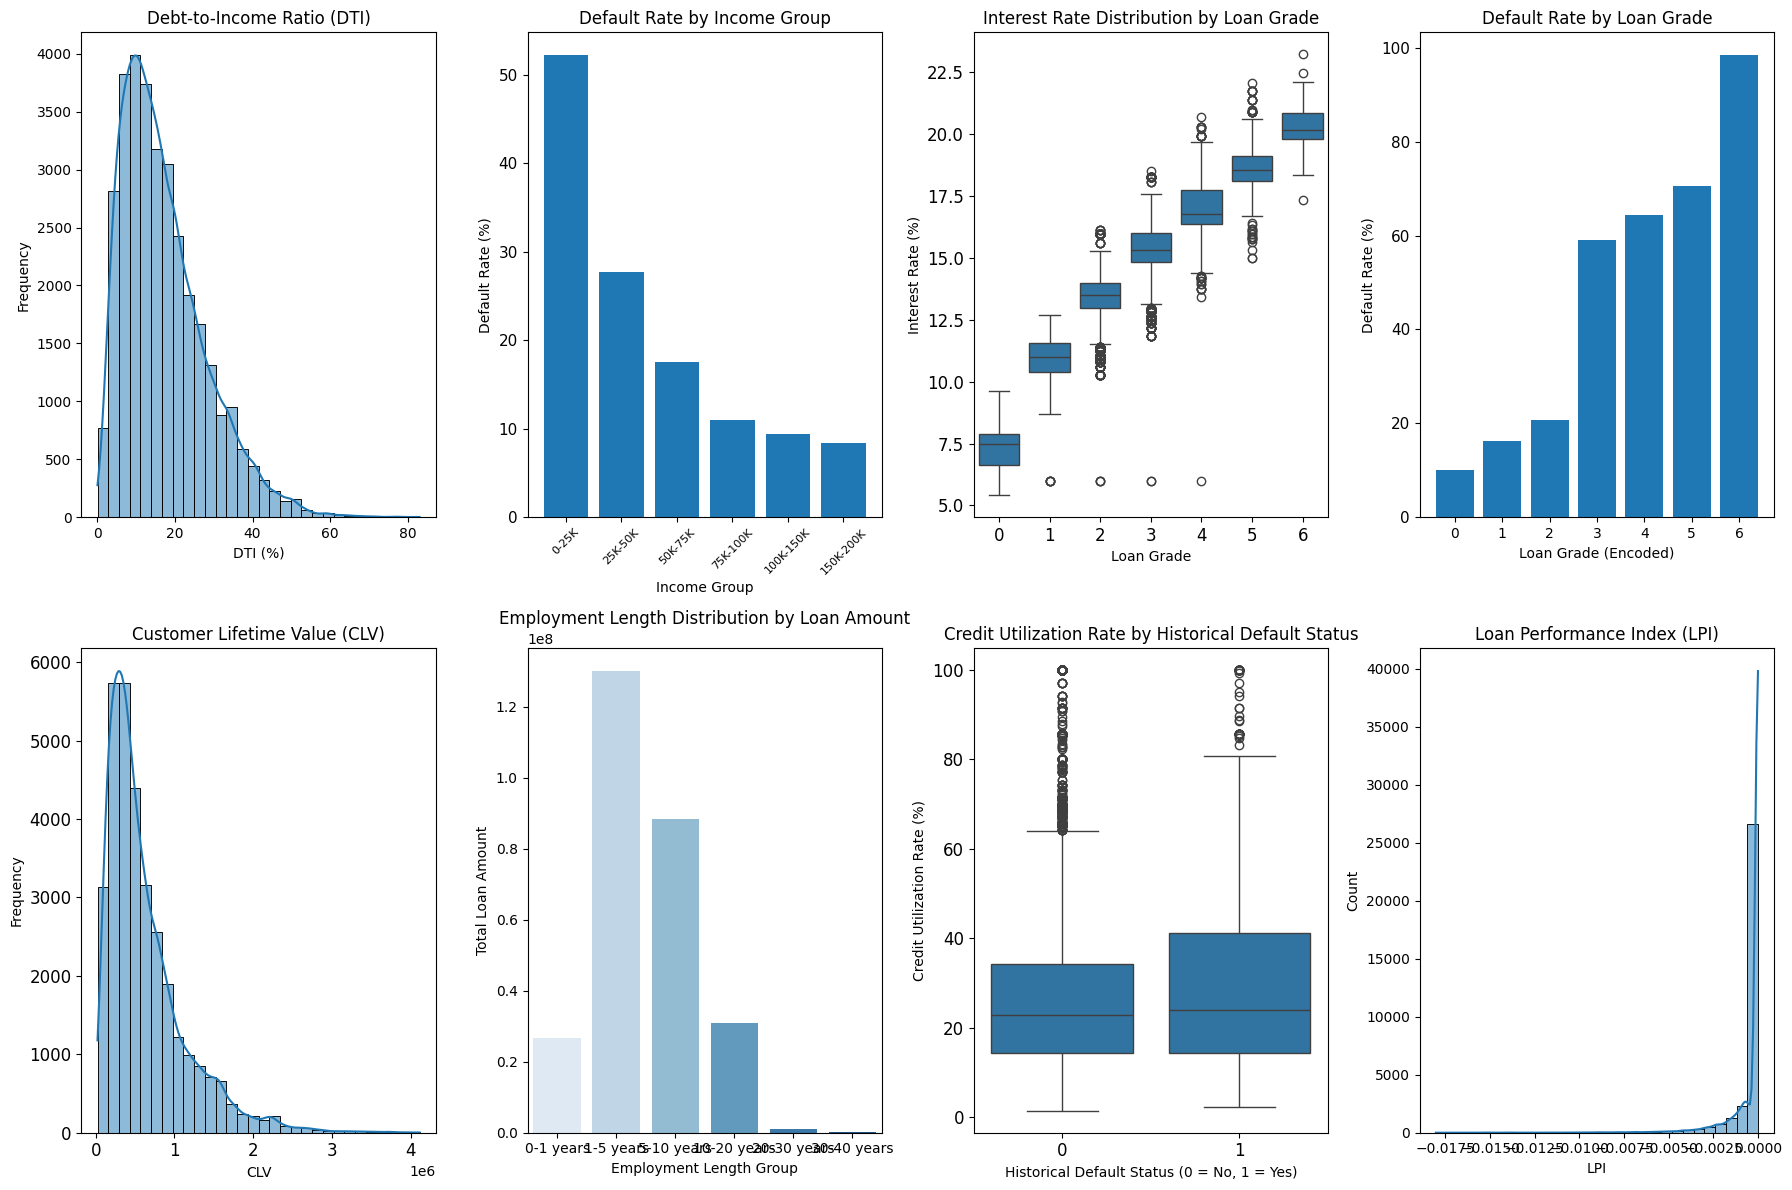

In [25]:
# Set the figure size and create 8 subplots in a 2x4 grid
plt.figure(figsize=(18, 12))

# Plot 1: Debt-to-Income Ratio (DTI)
plt.subplot(2, 4, 1)
sns.histplot(cleaned_data['DTI'], bins=30, kde=True)
plt.title('Debt-to-Income Ratio (DTI)')
plt.xlabel('DTI (%)')
plt.ylabel('Frequency')

# Plot 2: Default Rate by Income Group
plt.subplot(2, 4, 2)
plt.bar(income_group_default_rate.index, income_group_default_rate)
plt.title('Default Rate by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Default Rate (%)')
plt.xticks(fontsize=8, rotation=45)
plt.yticks(fontsize=11)

# Plot 3: Interest Rate Distribution by Loan Grade
plt.subplot(2, 4, 3)
sns.boxplot(x='loan_grade_encoded', y='loan_int_rate', data=cleaned_data)
plt.title('Interest Rate Distribution by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate (%)')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot 4: Default Rate by Loan Grade
plt.subplot(2, 4, 4)
plt.bar(loan_grade_default_rate.index, loan_grade_default_rate)
plt.title('Default Rate by Loan Grade')
plt.xlabel('Loan Grade (Encoded)')
plt.ylabel('Default Rate (%)')
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=11)

# Plot 5: Customer Lifetime Value (CLV)
plt.subplot(2, 4, 5)
sns.histplot(cleaned_data['CLV'], bins=30, kde=True)
plt.title('Customer Lifetime Value (CLV)')
plt.xlabel('CLV')
plt.ylabel('Frequency')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot 6: Employment Length Distribution by Loan Amount
plt.subplot(2, 4, 6)
sns.barplot(x=loan_amount_by_employment_length.index, y=loan_amount_by_employment_length, palette='Blues')
plt.title('Employment Length Distribution by Loan Amount')
plt.xlabel('Employment Length Group')
plt.ylabel('Total Loan Amount')

# Plot 7: Credit Utilization Rate by Historical Default Status
plt.subplot(2, 4, 7)
sns.boxplot(x='cb_person_default_on_file_encoded', y='Credit_Utilization_Rate', data=cleaned_data)
plt.title('Credit Utilization Rate by Historical Default Status')
plt.xlabel('Historical Default Status (0 = No, 1 = Yes)')
plt.ylabel('Credit Utilization Rate (%)')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot 8: Loan Performance Index (LPI)
plt.subplot(2, 4, 8)
sns.histplot(cleaned_data['LPI'], bins=30, kde=True)
plt.title('Loan Performance Index (LPI)')
plt.xlabel('LPI')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show all the plots in a single figure
plt.show()
